# Importing all the models

In [148]:
# importing all the models
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder,scale
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import seaborn as sns

In [149]:
# Loading the dataset
pd.options.display.max_columns=100
df=pd.read_csv('mushroom.csv',index_col=0)
df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,
1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,cup,smooth,silky,gray,yellow,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,rooted,silky,silky,cinnamon,brown,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,cup,scaly,silky,yellow,gray,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,club,smooth,scaly,yellow,pink,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,missing,fibrous,scaly,gray,white,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [150]:

df.shape

(2000, 25)

In [151]:
# checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1167 to 1073
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 2000 non-null   object 
 1   cap_surface               2000 non-null   object 
 2   cap_color                 2000 non-null   object 
 3   bruises                   2000 non-null   object 
 4   odor                      2000 non-null   object 
 5   gill_attachment           2000 non-null   object 
 6   gill_spacing              2000 non-null   object 
 7   gill_size                 2000 non-null   object 
 8   gill_color                2000 non-null   object 
 9   stalk_shape               2000 non-null   object 
 10  stalk_root                2000 non-null   object 
 11  stalk_surface_above_ring  2000 non-null   object 
 12  stalk_surface_below_ring  2000 non-null   object 
 13  stalk_color_above_ring    2000 non-null   object 
 14  stalk_colo

In [152]:
# stastical summary of the data
df.describe()

,stalk_height,cap_diameter
count,2000.000000,2000.000000
mean,8.449118,12.314345
std,3.697217,7.048845
min,2.000000,1.000000
25%,5.291009,5.723521
50%,8.318596,12.124902
75%,11.781272,18.698605
max,15.095066,25.000054


In [153]:
# checking the missing values
df.isnull().sum()

,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0
stalk_shape,0


# Data Visualization

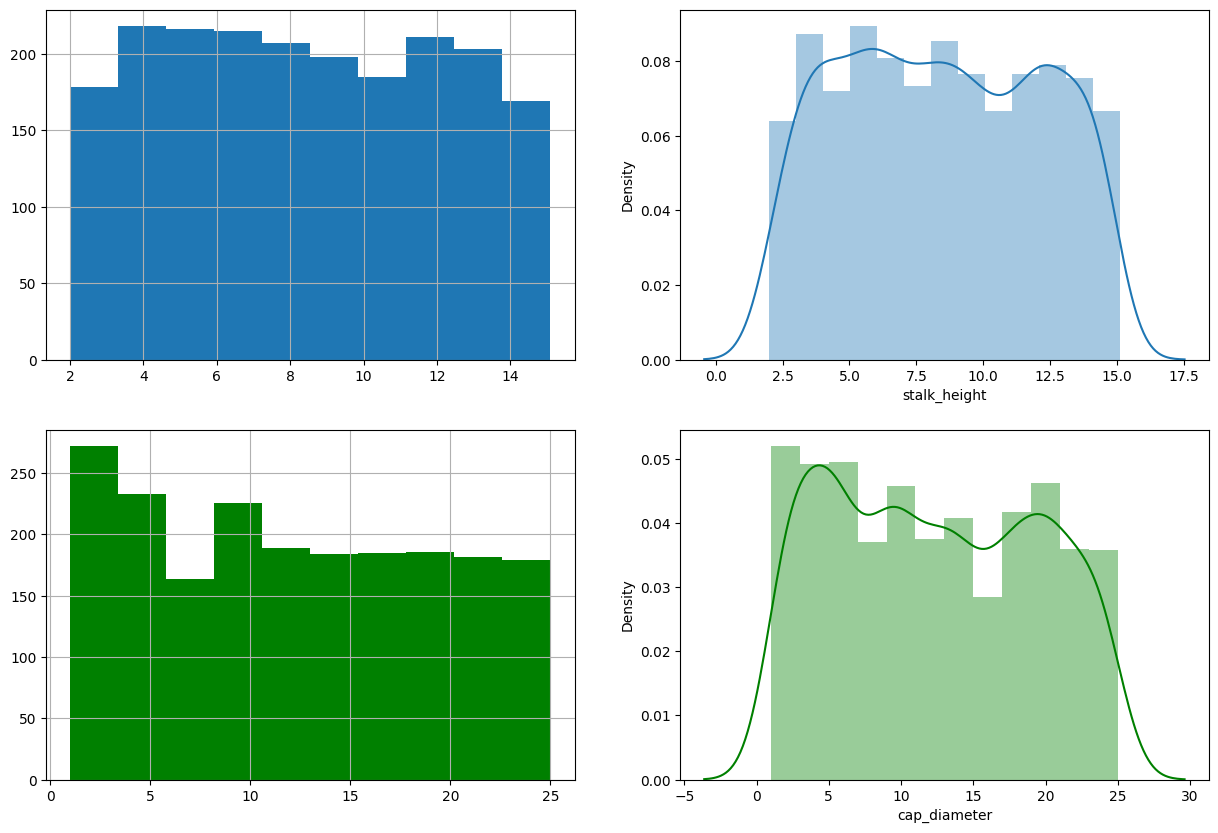

In [154]:
# histogram for stalk_height,cap_diameter numerical features
import warnings
warnings.filterwarnings('ignore')
fig,ax=plt.subplots(figsize=(15,10),ncols=2,nrows=2)
df['stalk_height'].hist(ax=ax[0,0])
sns.distplot(df['stalk_height'],ax=ax[0,1])
df['cap_diameter'].hist(ax=ax[1,0],color='Green')
sns.distplot(df['cap_diameter'],ax=ax[1,1],color="Green")
plt.show()

In [155]:
# calculating the skewness
# Here, Both features are postively skewed
df.skew(numeric_only=True)

,0
stalk_height,0.038312
cap_diameter,0.107595


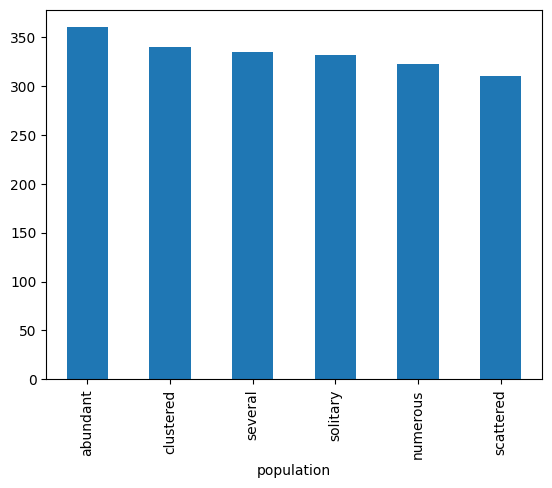

In [156]:
# Here, we plot barchart for only
# population,habitat,class
df['population'].value_counts().plot(kind='bar')
plt.show()

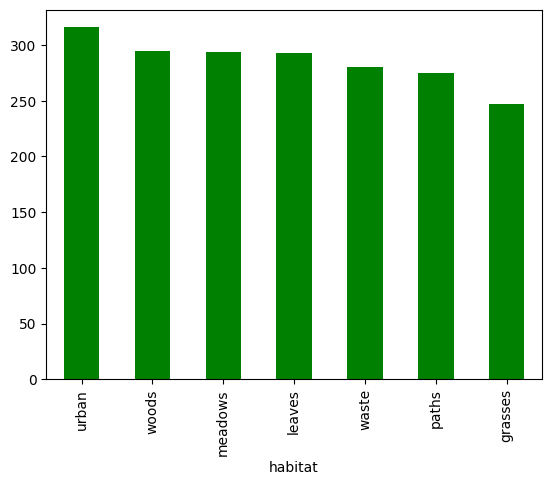

In [157]:
df['habitat'].value_counts().plot(kind='bar',color='Green')
plt.show()

#### In these dataset almost same number of mushroom species will be collected from different regions(habitat).

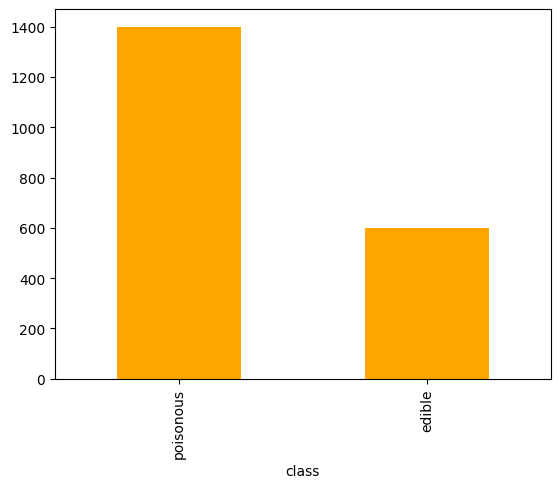

In [158]:
df['class'].value_counts().plot(kind='bar',color='orange')
plt.show()

#### In these dataset most of the mushrooms are poisonous and data is imbalanced.

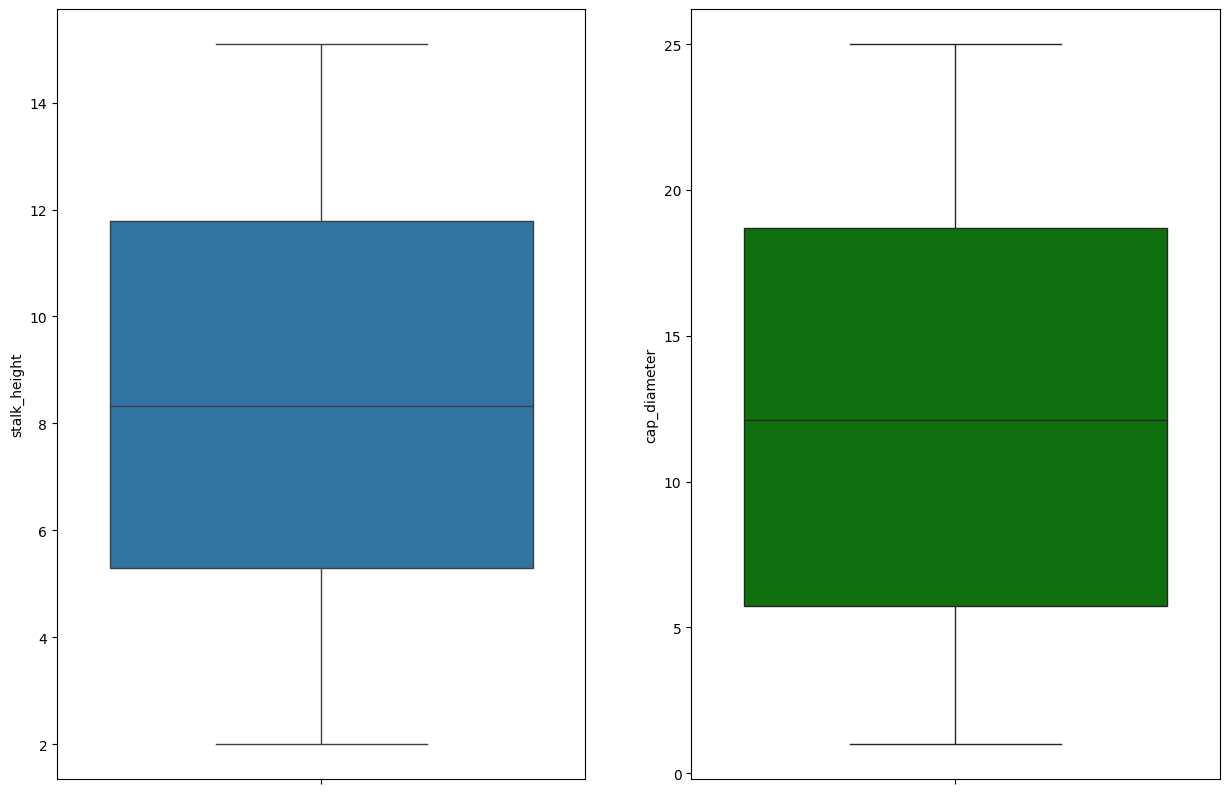

In [159]:
# boxplot for stalk_ height,cap_diameter features
# these two features have no outliers.
fig,ax=plt.subplots(figsize=(15,10),ncols=2)
sns.boxplot(df['stalk_height'],ax=ax[0])
sns.boxplot(df['cap_diameter'],ax=ax[1],color='Green')
plt.show()

In [147]:
#ploting the pairplot
sns.pairplot(df)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [160]:
# finding the correlation
corr=df.select_dtypes(include=np.number).corr()

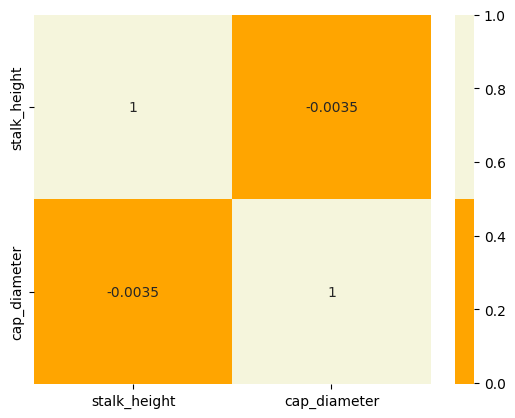

In [161]:
# plotting the correlation
# Here two features are negatively correlated.
sns.heatmap(corr,annot=True,cmap=["Orange","Beige"])
plt.show()

# Data Preprocessing

In [162]:
# Using the label encoder
lab=LabelEncoder()
columns=df.select_dtypes(include='object').columns
for x in columns:
  df[x]=lab.fit_transform(df[x])

In [163]:
df

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,
1167,4,2,7,0,1,1,2,0,7,1,2,3,2,3,8,0,0,2,6,3,1,5,1,14.276173,5.054983
1037,4,0,6,0,1,3,1,1,3,0,6,2,2,2,0,1,0,2,6,1,2,5,0,3.952715,19.068319
309,3,1,5,1,4,1,1,0,8,1,2,1,2,8,3,1,3,2,6,6,0,5,1,9.054265,7.205884
282,0,2,4,1,3,3,0,0,6,0,1,3,1,8,5,0,3,2,0,4,1,0,1,5.226499,20.932692
820,3,3,8,1,5,2,1,1,6,0,4,0,1,3,7,1,2,0,4,8,1,4,1,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,4,2,0,1,4,0,1,1,3,1,0,2,2,5,4,0,1,1,2,6,0,1,1,5.877891,17.464145
1160,4,2,5,1,5,0,2,1,9,1,5,0,0,5,4,0,2,1,7,8,2,5,1,6.500840,13.501957
265,2,1,3,1,3,3,0,1,7,1,4,3,2,0,6,0,0,2,1,8,0,6,1,13.558064,11.270020


In [164]:
# splitting the depedent and indepedent variable
x=df.drop('class',axis=1)
y=df['class']

In [165]:
# standardization of features
scal=scale(x)
x=pd.DataFrame(scal,columns=x.columns)
x1=x

In [166]:
x

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
0,1.356643,0.398424,1.194966,-1.023271,-1.175776,-0.498601,1.213339,-1.007025,0.487617,1.040833,-0.409440,1.380941,0.457901,-0.363507,1.503079,-1.010051,-1.302350,1.246952,1.062902,-0.345783,-0.841884,0.979166,1.576459,-1.030123
1,1.356643,-1.396280,0.814161,-1.023271,-1.175776,1.277359,-0.007938,0.993024,-0.693054,-0.960769,1.564953,0.492876,0.457901,-0.748985,-1.572275,0.990050,-1.302350,1.246952,1.062902,-1.109522,-0.264460,0.979166,-1.216463,0.958407
2,0.660035,-0.498928,0.433356,0.977259,0.004524,-0.498601,-0.007938,-1.007025,0.782785,1.040833,-0.409440,-0.395189,0.457901,1.563888,-0.419017,0.990050,1.381985,1.246952,1.062902,0.799826,-1.419308,0.979166,0.163717,-0.724904
3,-1.429786,0.398424,0.052551,0.977259,-0.388909,1.277359,-1.229216,-1.007025,0.192449,-0.960769,-0.903038,1.380941,-0.445257,1.563888,0.349822,-1.010051,1.381985,1.246952,-1.552935,0.036087,-0.841884,-1.557533,-0.871852,1.222967
4,0.660035,1.295777,1.575772,0.977259,0.397958,0.389379,-0.007938,0.993024,0.192449,-0.960769,0.577757,-1.283254,-0.445257,-0.363507,1.118660,0.990050,0.487207,-1.223483,0.190956,1.563564,-0.841884,0.471826,1.511897,0.032765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.356643,0.398424,-1.470669,0.977259,0.004524,-1.386580,-0.007938,0.993024,-0.693054,1.040833,-1.396636,0.492876,0.457901,0.407451,-0.034598,-1.010051,-0.407571,0.011735,-0.680990,0.799826,-1.419308,-1.050193,-0.695623,0.730771
1996,1.356643,0.398424,0.433356,0.977259,0.397958,-1.386580,1.213339,0.993024,1.077953,1.040833,1.071355,-1.283254,-1.348414,0.407451,-0.034598,-1.010051,0.487207,0.011735,1.498875,1.563564,-0.264460,0.979166,-0.527090,0.168525
1997,-0.036572,-0.498928,-0.328254,0.977259,-0.388909,1.277359,-1.229216,0.993024,0.487617,1.040833,0.577757,1.380941,0.457901,-1.519943,0.734241,-1.010051,-1.302350,1.246952,-1.116962,1.563564,-1.419308,1.486505,1.382181,-0.148193
1998,-1.429786,1.295777,1.194966,-1.023271,1.184825,0.389379,-1.229216,0.993024,0.192449,-0.960769,1.564953,-0.395189,-1.348414,-0.363507,0.349822,0.990050,1.381985,0.011735,-1.552935,-1.109522,1.467811,1.486505,0.715199,-0.552164


In [167]:
# using the PCA to reduce the features
# because, here lot of features is there
x_pca=PCA()
x_pca.fit_transform(x)

array([[-0.75096019, -2.15445372,  1.35265205, ..., -0.20304755,
        -0.25034159, -0.82195574],
       [-0.97660514,  1.7289152 ,  1.80821353, ..., -0.70806962,
         0.77021039,  0.34111784],
       [-1.08431001, -0.29554324, -1.45308722, ..., -0.60956124,
        -0.7707125 , -0.0556094 ],
       ...,
       [-1.13446599,  0.66347458,  2.56128305, ...,  1.81156881,
        -0.93161815,  0.85931624],
       [ 0.3951991 ,  1.81431483, -0.37990521, ...,  0.11875982,
         0.43268118,  0.44610854],
       [-1.58549759,  0.62232441,  0.73231384, ...,  0.62865047,
        -0.46259985,  1.70300083]])

In [168]:
Var_ratio=x_pca.explained_variance_ratio_

In [169]:
np.cumsum(Var_ratio)

array([0.05597321, 0.10876761, 0.15923962, 0.2087325 , 0.25743214,
       0.30518431, 0.35180982, 0.3974955 , 0.44245038, 0.48694868,
       0.52920168, 0.57091944, 0.611226  , 0.65036241, 0.68933786,
       0.72727727, 0.76484531, 0.80064077, 0.83596052, 0.87069537,
       0.90415674, 0.93695365, 0.96913516, 1.        ])

In [170]:
# here we are considering 90% of the data
x_pca=PCA(n_components=21)
x=x_pca.fit_transform(x)

In [171]:
x

array([[-0.75096019, -2.15445372,  1.35265205, ..., -0.63135632,
         1.38163973,  0.08102227],
       [-0.97660514,  1.7289152 ,  1.80821353, ...,  0.41952828,
         0.24771374, -0.31127232],
       [-1.08431001, -0.29554324, -1.45308722, ...,  0.31074353,
         1.18905804,  0.74609097],
       ...,
       [-1.13446599,  0.66347458,  2.56128305, ..., -0.79037954,
         0.16275193,  1.04422934],
       [ 0.3951991 ,  1.81431483, -0.37990521, ..., -0.02037927,
        -0.91429465,  1.98663467],
       [-1.58549759,  0.62232441,  0.73231384, ..., -0.52678872,
         0.38796754,  1.09989251]])

In [172]:
# splitting the dataset into training and testing split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [173]:
x_train

array([[-0.48578553, -0.6859522 ,  0.75771494, ...,  0.18876185,
         0.61117641, -1.00376729],
       [-0.12578952,  1.67270649,  2.18869888, ..., -0.75410954,
        -0.17728053,  1.02381651],
       [ 0.4817016 , -1.6866553 ,  0.35465942, ..., -1.38258362,
         0.92121459,  0.91972186],
       ...,
       [ 0.52260247,  0.157197  , -1.24127928, ..., -1.01413157,
         0.44632946, -0.4594283 ],
       [-1.65247393, -1.4716696 ,  0.72945017, ...,  0.44250589,
        -1.33998059, -1.08576424],
       [-2.61132207,  0.31167986,  1.27865089, ...,  1.86490771,
        -1.44515031,  0.96139577]])

# Modeling

In [174]:
# intialize the SVC
model=SVC()
model.fit(x_train,y_train)

SVC()

In [175]:
# predicting the values
y_pred=model.predict(x_test)

In [176]:
# calculating the accuracy_score
accuracy_score(y_test,y_pred)

0.77

# Tuning the Model

In [177]:
# defining the parameters
kernel=["rbf"]
gamma=[1,5,10,15,20,25,30,'scale']
# Here, i choose the penalty(c) values has random
c=[0.01,10,15,20,55,30,1]
param_grid=[{'kernel':kernel,'gamma':gamma,'C':c}]

In [178]:
# intializing the GridSearchCV
grid=GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.01, 10, 15, 20, 55, 30, 1],
                          'gamma': [1, 5, 10, 15, 20, 25, 30, 'scale'],
                          'kernel': ['rbf']}])

In [179]:
#finding the best score
grid.best_score_

np.float64(0.8512500000000001)

In [180]:
# finding the best parameter
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [181]:
model=grid.best_estimator_
model.fit(x_train,y_train)

SVC(C=10, gamma=1)

In [182]:
# predicting the target values
y_predict=model.predict(x_test)

#### Here, I cannot tune the model with kernel parameters such as polynomial,linear. Because it almost takes lot of time to tune the model with those parameters.

# Model Evaluation

In [183]:
# calculating the accuracy score
accuracy_score(y_test,y_predict)

0.885

In [184]:
# calculating the precision score
precision_score(y_test,y_predict)

0.853035143769968

In [185]:
# calculating the recall score
recall_score(y_test,y_predict)

1.0

In [186]:
# calculating the f1 score
f1_score(y_test,y_predict)

0.9206896551724137

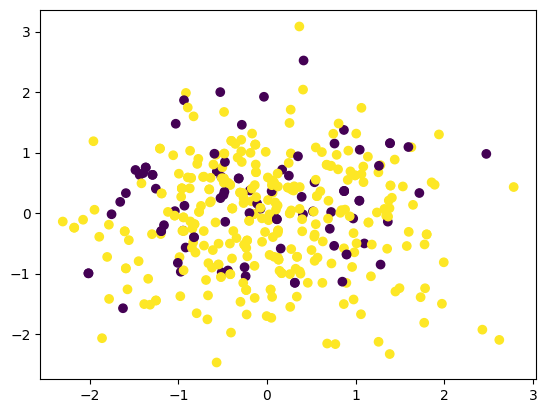

In [187]:
# visualization of the classification results
# Here, I consider the population,spore_print_color to plot
x_test_d=pd.DataFrame(x_test)
plt.scatter(x_test_d[:][19],x_test_d[:][20],c=y_predict)
plt.show()

# Compare and Analysis

#### When we compare with different kernels such as rbf,linear,polynomial, it takes so much time for the execution part(more than 10 min) only. so i will be considering the rbf(kernel).
#### It performs well, when we apply PCA to the dataset to reduce the columns.In the orginal dataset has more columns, so it requires lot of EDA techniques to reduce columns or to consider most important features.
#### Partical implications of svm are diabetes prediction, spam Detection, customer churn analysis, finacial fraud detection and image processing in the real world.